## Real Estate price prediction

## Problem Statement:
Consider a real estate company that has a dataset containing the house price of unit area in the state of Maryland, USA. It wishes to use the data to optimize the prices based on important factors such housing age, distance to the nearest MRT station, number of convenience stores, latitude and longitude
## Essentially, the company wants —
•	To identify the variables affecting house prices per unit area, 
•	To create a linear model that quantitatively relates house prices with variables such as house age, distance to the nearest MRT station etc
•	To know the accuracy of the model, i.e. how well these variables can predict house prices.
## Business Goal
I am required to model the house price of a unit area with the available independent variables. It will be used by the management to understand how exactly the price vary with the independent variables. They can accordingly manipulate the design of the houses, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


In [1]:
#Libaries

In [3]:
import pandas as pd # for manipulating data
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns # for visualizations
import requests # for loading data from an online resource
from io import StringIO # for reading inputs


## Reading and understanding the data

Let's start with the following steps:

Importing data using the pandas library

Understanding the structure of the data

In [4]:
#loading data
#my dataset is in a .csv file type. Pandas variable pd is used to access the dataset with read_csv() function.

In [5]:
real_estate = pd.read_csv('datasets_879791_1497705_datasets_88705_204267_Real estate.csv')

In [6]:
real_estate

No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
..   ...                  ...           ...   
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..                                      ...                              ...   
409                              4082.01500                                0   
410                                90.45606                                9   
411                               390.96960                                7   
412                               104.81010                                5   
413                                90.45606                                9   

     X5 latitude  X6 longitude  Y house price of unit area  
0       24.98298     121.54024                        37.9  
1       24.98034     121.53951                        42.2  
2       24.98746     121.54391                        47.3  
3       24.98746     121.54391                        54.8  
4       24.97937     121.54245                        43.1  
..           ...           ...                         ...  
409     24.94155     121.50381                        15.4  
410     24.97433     121.54310                        50.0  
411     24.97923     121.53986                        40.6  
412     24.96674     121.54067                        52.5  
413     24.97433     121.54310                        63.9  

[414 rows x 8 columns]

In [8]:
#Inspecting the various aspects of my data frame

In [9]:
#the head gives me the first 5 rows of my data set
real_estate.head()

No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1

In [10]:
real_estate.shape # It gives me the total number of rows and columns my dataset is made up of

(414, 8)

In [11]:
# my data set has 414rows and 8 columns

In [12]:
#Generate various summary statistics, excluding NaN values.

In [13]:
real_estate.describe()

No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  X6 longitude  \
count                       414.000000   414.000000    414.000000   
mean                          4.094203    24.969030    121.533361   
std                           2.945562     0.012410      0.015347   
min                           0.000000    24.932070    121.473530   
25%                           1.000000    24.963000    121.528085   
50%                           4.000000    24.971100    121.538630   
75%                           6.000000    24.977455    121.543305   
max                          10.000000    25.014590    121.566270   

       Y house price of unit area  
count                  414.000000  
mean                    37.980193  
std                     13.606488  
min                      7.600000  
25%                     27.700000  
50%                     38.450000  
75%                     46.600000  
max                    117.500000

In [14]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [15]:
# Check for null values
real_estate.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

My dataset has no null values

There is no need of 'No' column and 'Date' column, hence dropping it.

In [16]:
real_estate.drop(['No'], axis=1, inplace=True)
real_estate.drop(['X1 transaction date'],axis=1, inplace=True)

In [17]:
real_estate.head()

X2 house age  X3 distance to the nearest MRT station  \
0          32.0                                84.87882   
1          19.5                               306.59470   
2          13.3                               561.98450   
3          13.3                               561.98450   
4           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1                        42.2  
2                        47.3  
3                        54.8  
4                        43.1

## Data visualization

This inolves understanding my datasets by placing it in a visual context so that patterns, trends and correlations that might not otherwise be detected can be exposed.

<Figure size 432x864 with 0 Axes>

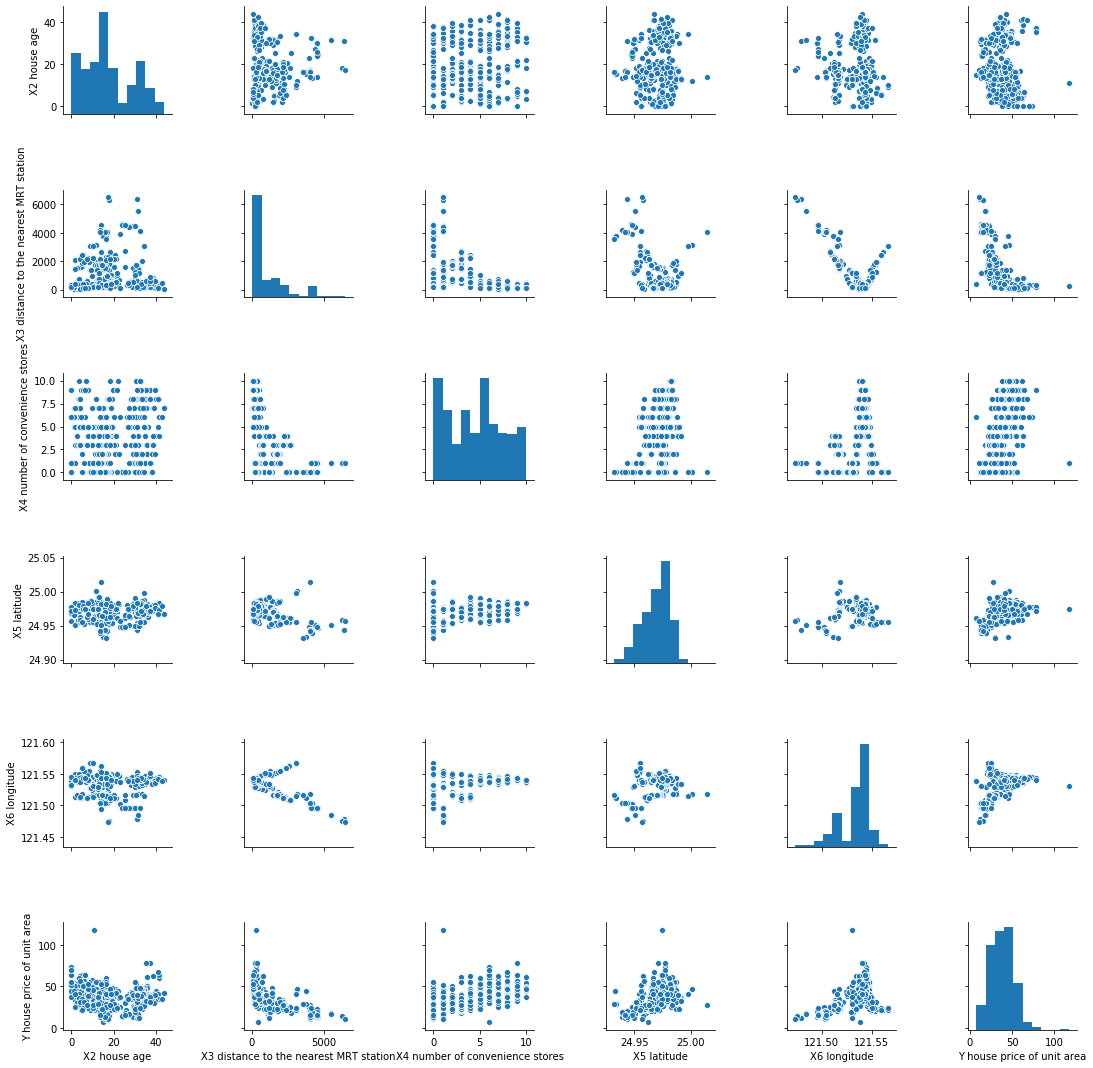

In [18]:
#Visualising all numeric variable
plt.figure(figsize=(6,12))
sns.pairplot(real_estate) # A pairs plot allows us to see both distribution of single variables and relationships between two
plt.show()

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables

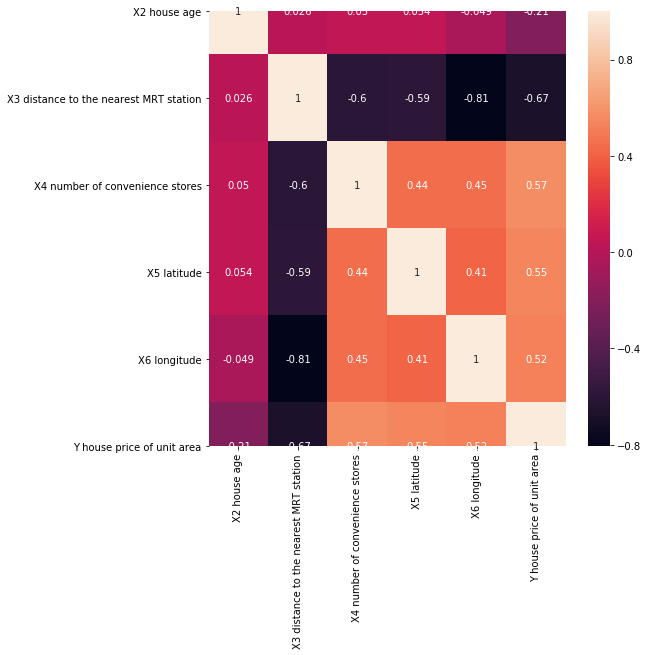

In [19]:
#Find correlation
plt.figure(figsize=(8, 8))
sns.heatmap(real_estate.corr(),annot=True)

## Data splitting to training and testing model
We’re going to use a couple of libraries: sklearn.model_selection to split the training and testing dataset, and matplotlib to draw the regression line.
I will split my datat such 80% will be the training data while 20% will be the testing data


In [20]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(0)
df_train,df_test = train_test_split(real_estate, train_size=0.80, test_size=0.20,random_state=100)
print(df_train.head())
print(df_test.head())

     X2 house age  X3 distance to the nearest MRT station  \
272          13.0                                492.2313   
390          32.8                                377.8302   
69           12.5                                561.9845   
325          36.6                                488.8193   
199          18.2                                451.6419   

     X4 number of convenience stores  X5 latitude  X6 longitude  \
272                                5     24.96515     121.53737   
390                                9     24.97151     121.54350   
69                                 5     24.98746     121.54391   
325                                8     24.97015     121.54494   
199                                8     24.96945     121.54490   

     Y house price of unit area  
272                        40.5  
390                        38.6  
69                         42.0  
325                        38.1  
199                        31.6  
     X2 house age  X3 dist

## Splitting the independent features from the target feature
Its very important we split the independent features from the target

In [21]:
#Dividing X and y sets for model building
y_train = df_train.pop('Y house price of unit area')
X_train = df_train

In [22]:
print(y_train.head())

272    40.5
390    38.6
69     42.0
325    38.1
199    31.6
Name: Y house price of unit area, dtype: float64


In [23]:
print(X_train.head())

     X2 house age  X3 distance to the nearest MRT station  \
272          13.0                                492.2313   
390          32.8                                377.8302   
69           12.5                                561.9845   
325          36.6                                488.8193   
199          18.2                                451.6419   

     X4 number of convenience stores  X5 latitude  X6 longitude  
272                                5     24.96515     121.53737  
390                                9     24.97151     121.54350  
69                                 5     24.98746     121.54391  
325                                8     24.97015     121.54494  
199                                8     24.96945     121.54490  


In [24]:
X_train.describe()

X2 house age  X3 distance to the nearest MRT station  \
count    331.000000                              331.000000   
mean      18.054079                             1130.287229   
std       11.459523                             1302.867768   
min        0.000000                               23.382840   
25%        9.100000                              289.324800   
50%       16.200000                              512.548700   
75%       29.500000                             1528.770000   
max       43.800000                             6488.021000   

       X4 number of convenience stores  X5 latitude  X6 longitude  
count                       331.000000   331.000000    331.000000  
mean                          3.987915    24.968761    121.532579  
std                           3.012073     0.012823      0.015539  
min                           0.000000    24.932070    121.473530  
25%                           1.000000    24.962990    121.525180  
50%                           4.000000    24.971100    121.537880  
75%                           6.000000    24.977440    121.543100  
max                          10.000000    25.014590    121.566270

In [25]:
# import linear regression

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
# fitting my model

In [28]:
lm= LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lm.coef_ #linear regression coefficients

array([-2.68358370e-01, -4.33678823e-03,  1.07588200e+00,  2.37330180e+02,
       -1.94156722e+01])

The coefficients of the independent variables are as follows

In [30]:
coeff = pd.DataFrame(lm.coef_, X_train.columns, columns=['coefficient'])
coeff

coefficient
X2 house age                              -0.268358
X3 distance to the nearest MRT station    -0.004337
X4 number of convenience stores            1.075882
X5 latitude                              237.330180
X6 longitude                             -19.415672

The above dataframe represents the cofficients of the independent variables

In [31]:
import statsmodels.api as sm
X_train_new = sm.add_constant(X_train)
lm_1 = sm.OLS(y_train, X_train).fit()
print(lm_1.summary())

C:\Users\cliff_sowjzp2\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                                     OLS Regression Results                                    
Dep. Variable:     Y house price of unit area   R-squared (uncentered):                   0.946
Model:                                    OLS   Adj. R-squared (uncentered):              0.945
Method:                         Least Squares   F-statistic:                              1139.
Date:                        Tue, 22 Sep 2020   Prob (F-statistic):                   5.63e-204
Time:                                15:11:19   Log-Likelihood:                         -1208.6
No. Observations:                         331   AIC:                                      2427.
Df Residuals:                             326   BIC:                                      2446.
Df Model:                                   5                                                  
Covariance Type:                    nonrobust                                                  
                                        

The regression output  below shows that the all the independent variables are statistically significant because their p-values equal 0.000. Any P-value  greater than the usual significance level of 0.05 is statistically not significant.

The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

R-squared is always between 0 and 100%. R-squared is always between 0 and 100%.In general, the higher the R-squared, the better the model fits your data

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features           VIF
0                                   const  2.171478e+08
2  X3 distance to the nearest MRT station  4.610000e+00
5                            X6 longitude  3.310000e+00
3         X4 number of convenience stores  1.600000e+00
4                             X5 latitude  1.590000e+00
1                            X2 house age  1.020000e+00

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. A large VIF on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.

All features p-value is significant and vif is less than 5. Hence no need to remove any feature

## Residual analysis of trained data

In [33]:
y_train_price = lm_1.predict(X_train) 

In [34]:
from sklearn.metrics import r2_score
r2_score(y_true=y_train,y_pred=y_train_price)

0.5490775866471654

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

my R2 score is above 50% which makes it a good score

## error term

In [35]:
#plot histogram of error terms
fig = plt.figure()
sns.distplot((y_train-y_train_price), bins=20)
fig.suptitle('Error Terms',fontsize = 20)
plt.xlabel('Error',fontsize=17)

Text(0.5, 0, 'Error')

 the error term is the difference between the expected price at a particular time and the price that was actually observed
 
 Error terms seem to be approximately normally distributed, so the assumption on the linear modeling is fulfilled.

## making prediction on final model 

In [36]:
y_test = df_test.pop('Y house price of unit area')
X_test = df_test

In [37]:
y_test_pred = lm_1.predict(X_test)

calculating r2 for my test value

In [38]:
#Evaluate r2
r2_score(y_true=y_test,y_pred=y_test_pred)

0.6689997634273366

In [39]:
df = pd.DataFrame({'Actual':y_test,'Predictions':y_test_pred})
df['Predictions']= round(df['Predictions'])
df.head()

Actual  Predictions
121    48.0         42.0
353    31.3         35.0
96     59.5         52.0
43     34.1         42.0
125    48.6         48.0

Text(0.5, 0.98, 'Actual Vs. Prediction')

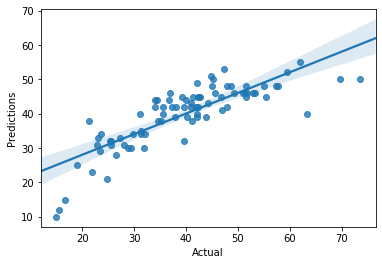

In [40]:
sns.regplot('Actual','Predictions',data=df)
fig.suptitle('Actual Vs. Prediction', fontsize = 15)

## Evaluating model performanace

In [41]:
from sklearn import metrics

#Mean absolute error(MAE)
print('MAE',metrics.mean_absolute_error(y_test,y_test_pred))
#Mean squared error(MSE)
print('MSE',metrics.mean_squared_error(y_test,y_test_pred))
#Root mean squared error(RMSE)
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))

MAE 5.4183854395275235
MSE 49.41158174311
RMSE 7.029337219333698


Mean Absolute Error (MAE): MAE measures the average magnitude of the errors in a set of predictions, without considering their direction

MSE (Mean Squared Error) represents the difference between the original and predicted values extracted by squared the average difference over the data set.

RMSE (Root Mean Squared Error) is the error rate by the square root of MSE.

[MAE] ≤ [RMSE]. The RMSE result will always be larger or equal to the MAE. If all of the errors have the same magnitude, then RMSE=MAE.